# Немножко специфичного литературоведения

Наше направление подготовки находится в группе 45 Языкознание и литературоведение. Не будем забывать свои корни )

В статье [О том, что происходит, когда в поиске Google используют слово «vs»](https://habr.com/ru/company/ruvds/blog/508652/) описан подход для построения эго-графов на основе запросов в Google. В качестве задания воспроизведите этот подход для любого запроса на ваше усмотрение.  

In [ ]:
import pandas as pd
import requests
#import xml
#import xml.etree.ElementTree as ET
from bs4 import BeautifulSoup

In [ ]:
w = "hamlet"

In [ ]:
#скачиваем данные
response =  requests.get(f'http://suggestqueries.google.com/complete/search?&output=toolbar&gl=us&hl=en&q={w}%20and%20').text
soup = BeautifulSoup(response, 'xml')
print(soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<toplevel>
 <CompleteSuggestion>
  <suggestion data="hamlet and ghost"/>
 </CompleteSuggestion>
 <CompleteSuggestion>
  <suggestion data="hamlet and ophelia"/>
 </CompleteSuggestion>
 <CompleteSuggestion>
  <suggestion data="hamlet and ophelia relationship"/>
 </CompleteSuggestion>
 <CompleteSuggestion>
  <suggestion data="hamlet and ghost menu"/>
 </CompleteSuggestion>
 <CompleteSuggestion>
  <suggestion data="hamlet and horatio"/>
 </CompleteSuggestion>
 <CompleteSuggestion>
  <suggestion data="hamlet and gertrude relationship"/>
 </CompleteSuggestion>
 <CompleteSuggestion>
  <suggestion data="hamlet and horatio relationship"/>
 </CompleteSuggestion>
 <CompleteSuggestion>
  <suggestion data="hamlet and the lion king"/>
 </CompleteSuggestion>
 <CompleteSuggestion>
  <suggestion data="hamlet and laertes"/>
 </CompleteSuggestion>
 <CompleteSuggestion>
  <suggestion data="hamlet and claudius"/>
 </CompleteSuggestion>
</toplevel>


In [ ]:
source = []
targ = []

In [ ]:
#достаем значения 
for element in soup.find_all('suggestion'):
    splitted = element['data'].split(' vs ')
    print(splitted)

['hamlet and ghost']
['hamlet and ophelia']
['hamlet and ophelia relationship']
['hamlet and ghost menu']
['hamlet and horatio']
['hamlet and gertrude relationship']
['hamlet and horatio relationship']
['hamlet and the lion king']
['hamlet and laertes']
['hamlet and claudius']


In [ ]:
#достаем значения 
for element in soup.find_all('suggestion'):
    splitted = element['data'].split(' and ')
    if len(splitted) == 2:
      source.append(splitted[0])
      targ.append(splitted[1])

In [ ]:
targ

['ghost',
 'ophelia',
 'ophelia relationship',
 'ghost menu',
 'horatio',
 'gertrude relationship',
 'horatio relationship',
 'the lion king',
 'laertes',
 'claudius']

In [ ]:
df = pd.DataFrame({'Source': source, 'Target': targ})
df

,Source,Target
0,hamlet,ghost
1,hamlet,ophelia
2,hamlet,ophelia relationship
3,hamlet,ghost menu
4,hamlet,horatio
5,hamlet,gertrude relationship
6,hamlet,horatio relationship
7,hamlet,the lion king
8,hamlet,laertes
9,hamlet,claudius


In [ ]:
#скачиваем остальные слова из пар

def ego_graph():
    for word in df['Target']:
    
        response =  requests.get(f"http://suggestqueries.google.com/complete/search?&output=toolbar&gl=us&hl=en&q={word}%20vs%20").text
        soup = BeautifulSoup(response, 'xml')
        for element in soup.find_all('suggestion'):
          splitted = element['data'].split(' and ')
          if len(splitted) == 2:
            df.loc[len(df)] = [splitted[0], splitted[1]]

ego_graph()        

In [ ]:
df

,Source,Target
0,hamlet,ghost
1,hamlet,ophelia
2,hamlet,ophelia relationship
3,hamlet,ghost menu
4,hamlet,horatio
5,hamlet,gertrude relationship
6,hamlet,horatio relationship
7,hamlet,the lion king
8,hamlet,laertes
9,hamlet,claudius


In [ ]:
import networkx as nx

G=nx.Graph()

G = nx.from_pandas_edgelist(df, source='Source', target='Target')

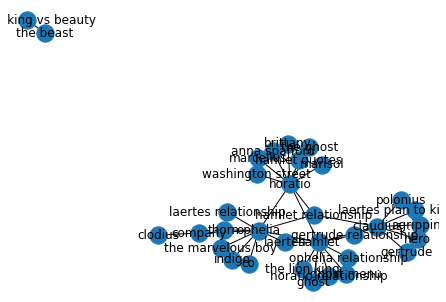

In [ ]:
nx.draw(G, with_labels = True)

In [ ]:
df.to_csv('ego_graph.csv', index = False, sep = ',') # импортируем для более симпатичной визуализации

In [ ]:
from IPython.display import HTML

In [ ]:
HTML('''<div class="flourish-embed flourish-network" data-src="visualisation/6172139"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

В книге "Дальнее чтение" Франко Моретти сетевой анализ используется для анализа сюжета. Например, на рисунке ниже сеть состоит из вершин и ребер (а сюжет, по утверждению автора книги) состоит из персонажей и действий). Персонажи становятся вершинами сети, а их взаимодействия — её ребрами.

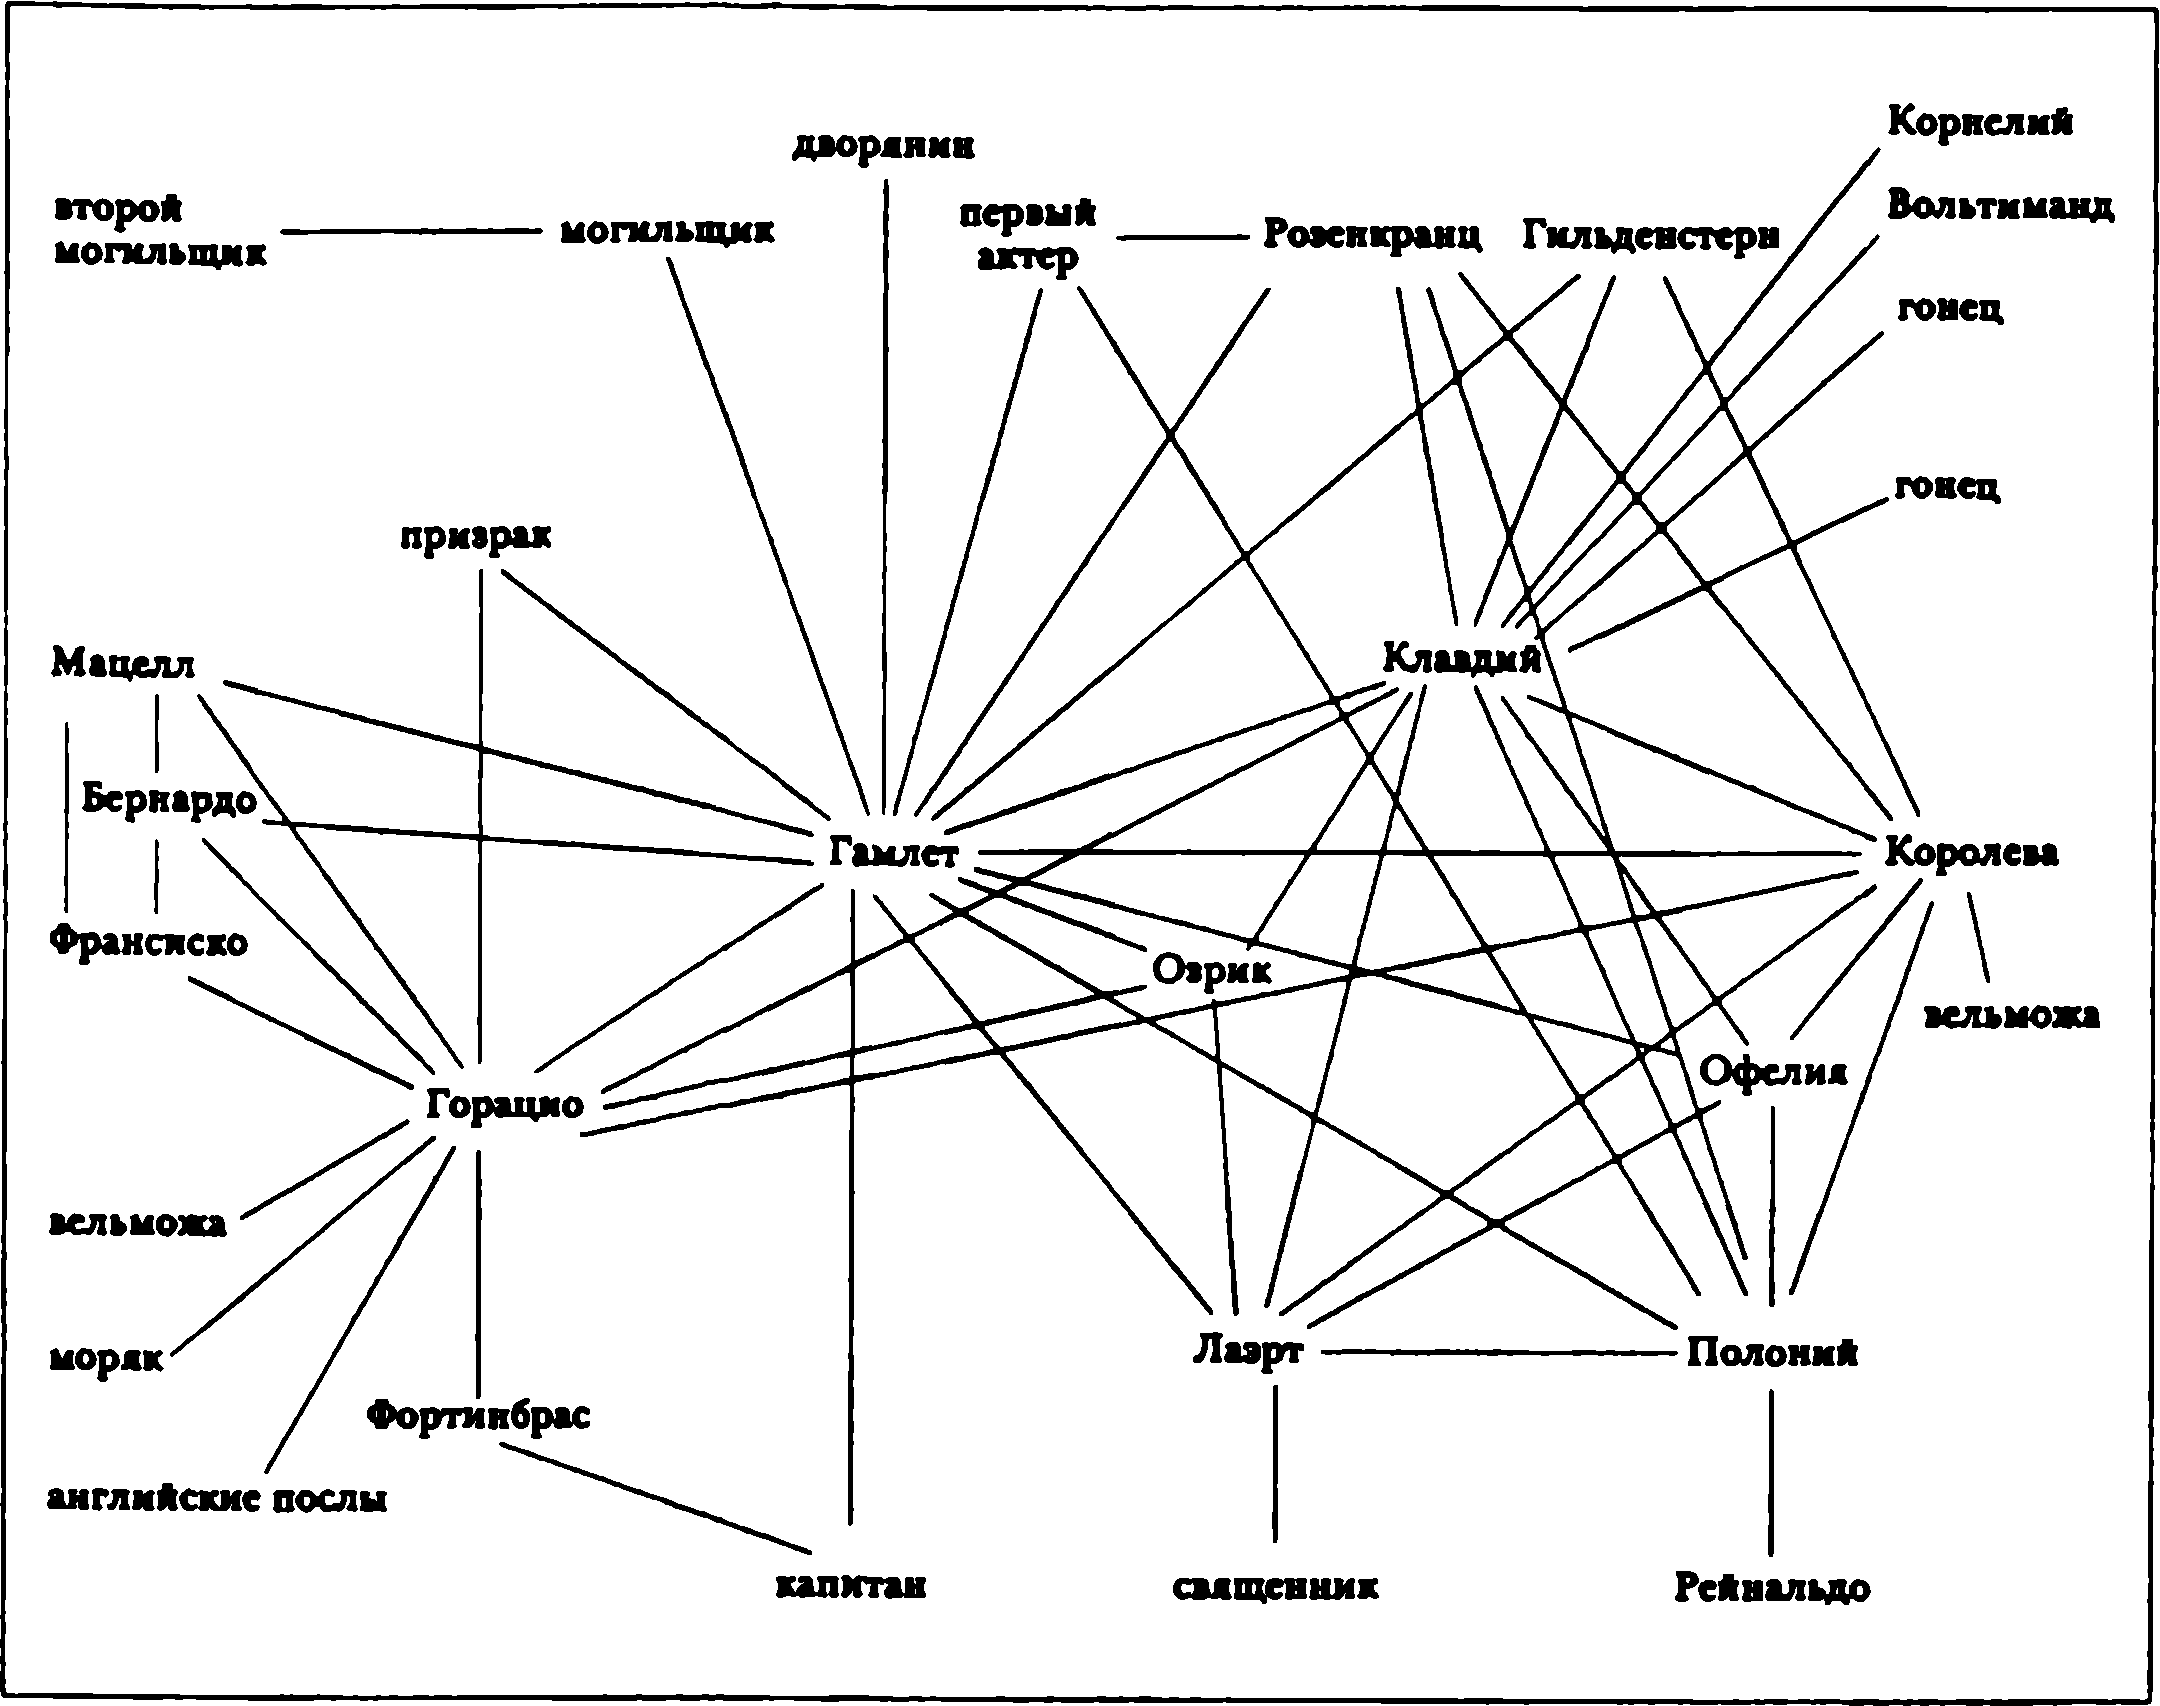

В книге Моретти пропагандируется пподход "дальнего чтения", фактически представляющий собой применение методов компьютерной лингвистики для литературоведческого анализа тектов. 

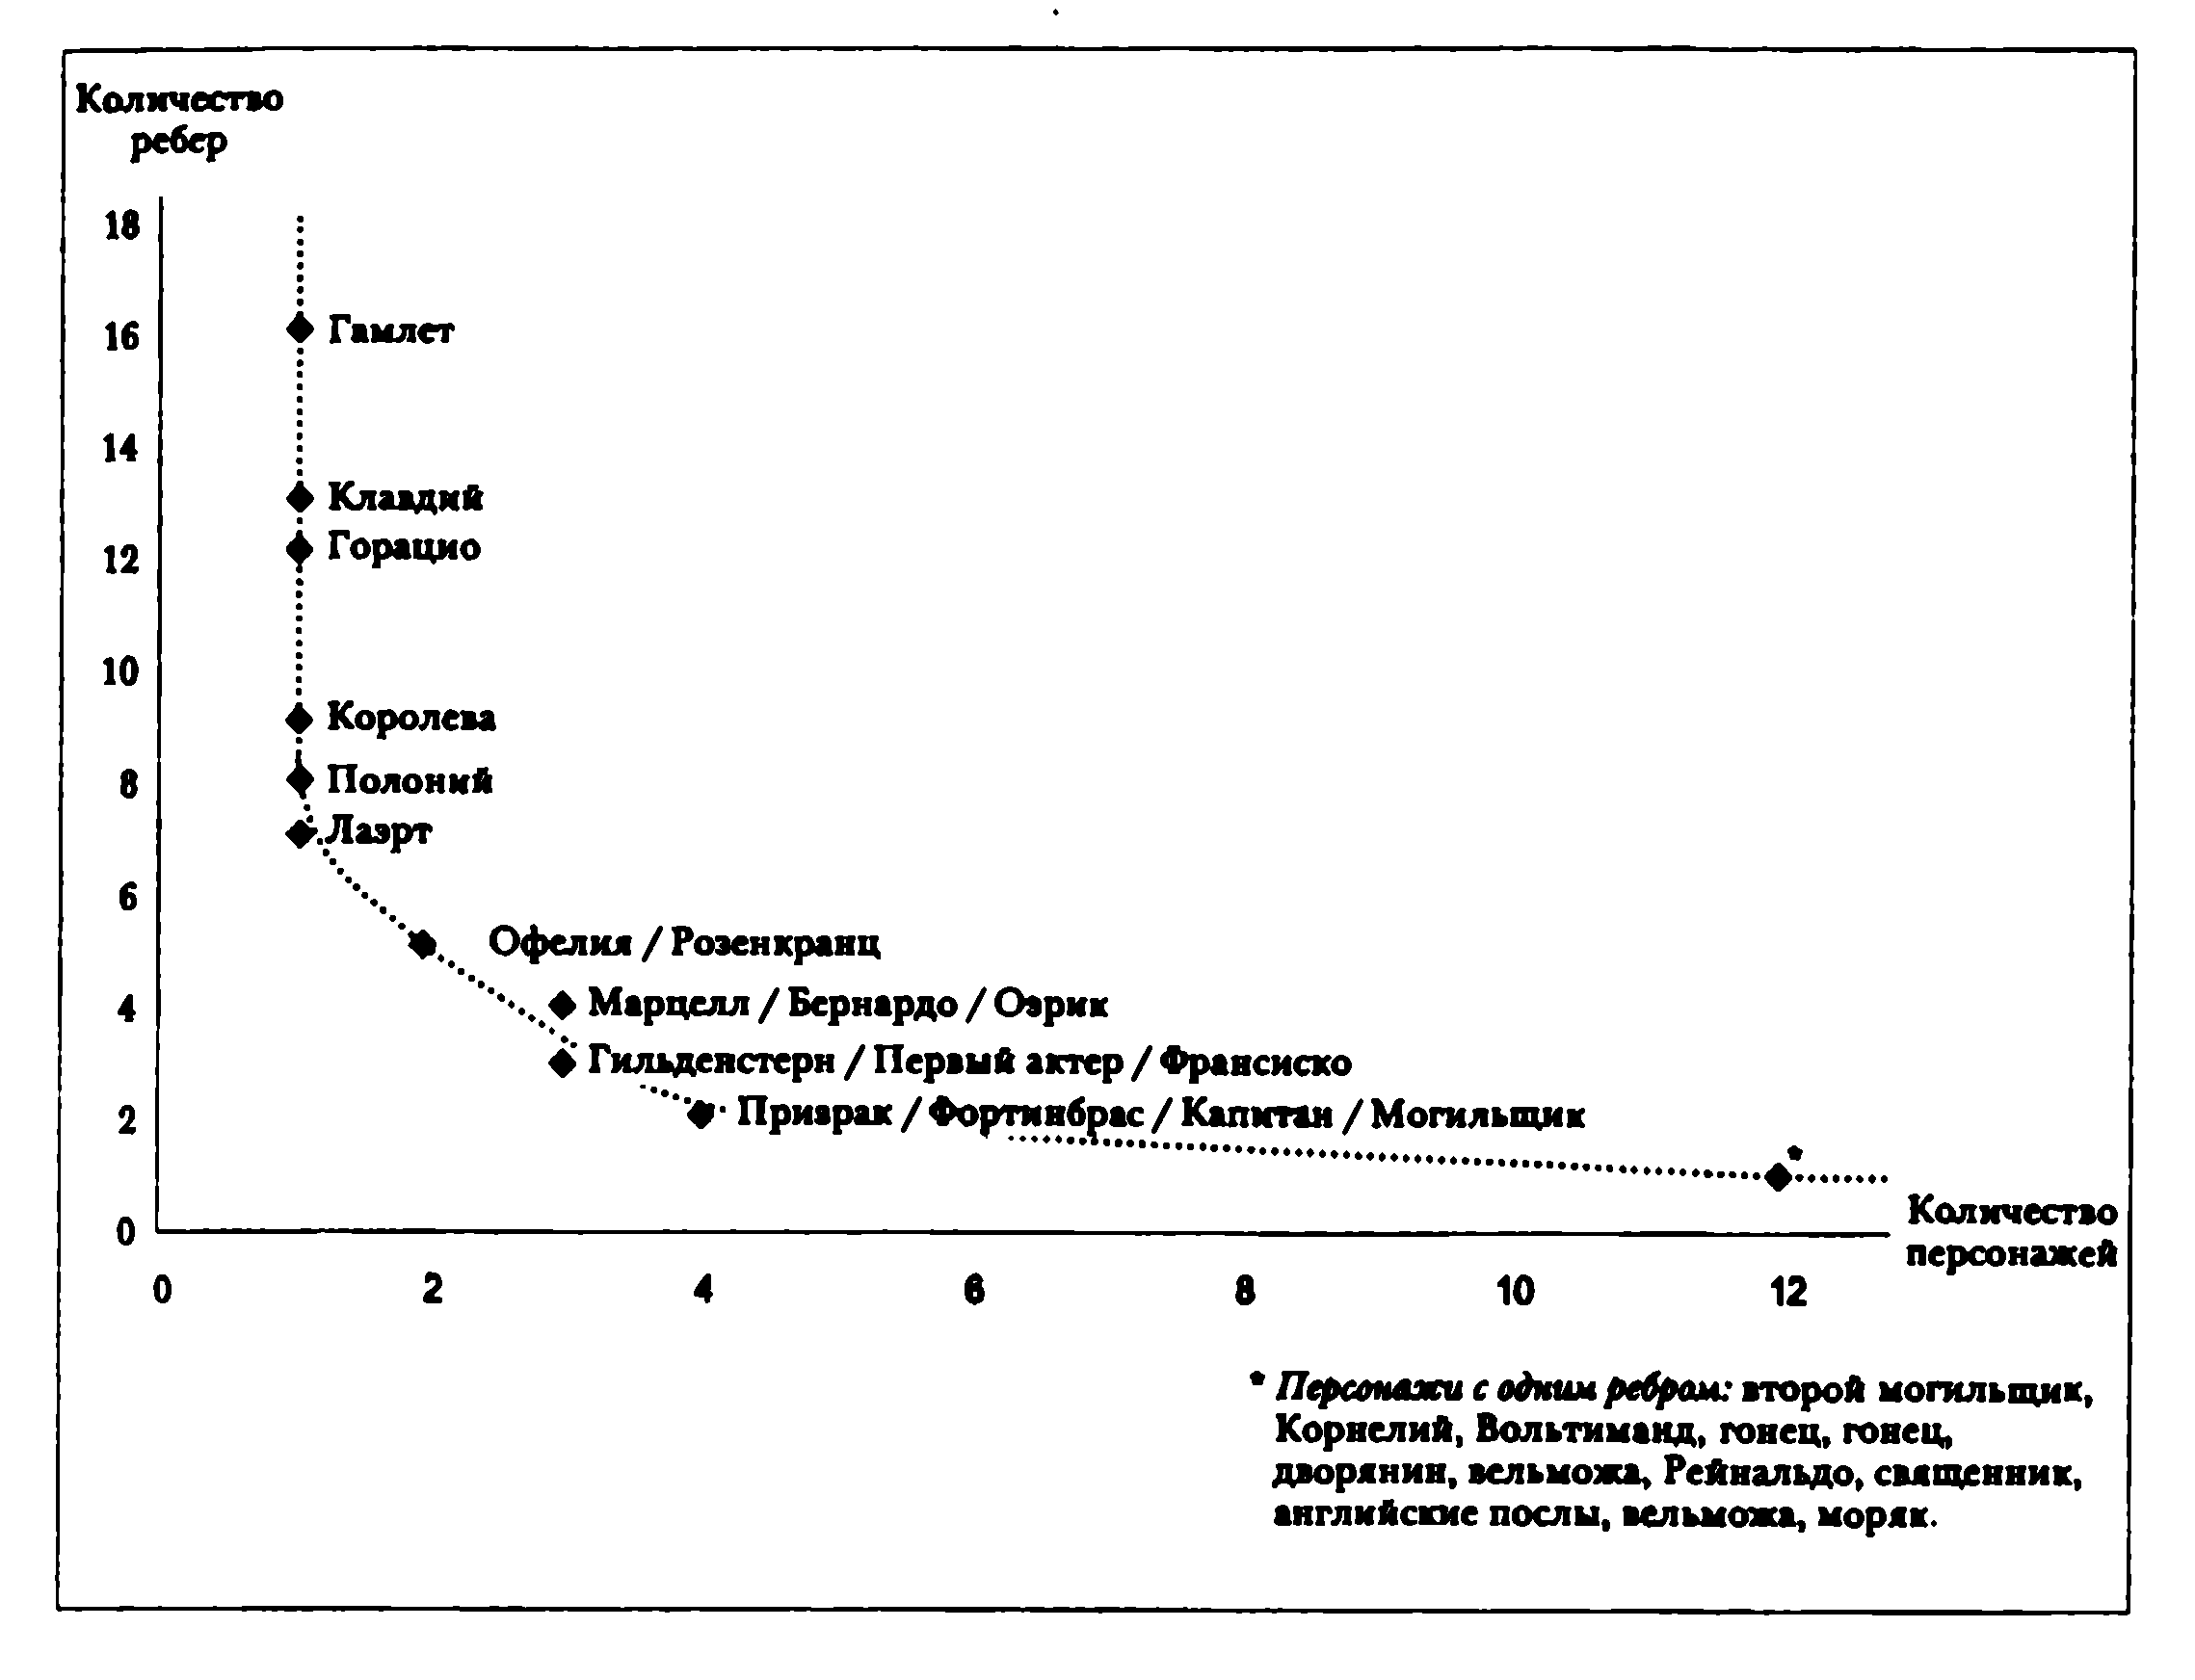

Этот методологический подход получил развитие. В частности совсем свежий пример: Fischer F., Skorinkin D. Social Network Analysis in Russian Literary Studies, in: The Palgrave Handbook of Digital Russia Studies / Ed. by D. Gritsenko, M. Wijermars, M. Kopotev. Palgrave Macmillan, 2021. Ch. 29. P. 517-536.

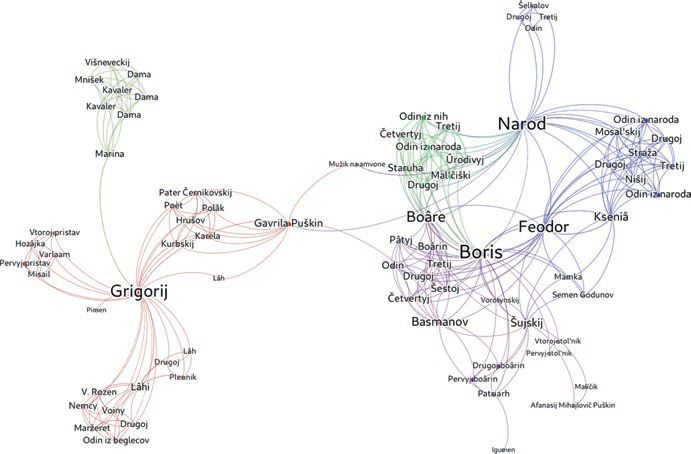

[Франк Фишер на Google Scholar](https://scholar.google.ru/citations?user=Rr4N3OwAAAAJ&hl=ru&oi=sra)

# Стилеметрия (стилометрия?)

Дальше идут отрывки из статьи "Стилометрия: как в разное время люди искали авторов текстов" https://sysblok.ru/knowhow/stilometrija-kak-v-raznoe-vremja-ljudi-iskali-avtorov-tekstov/

Вопросы авторства того или иного текста столетиями волнуют человечество. Например, существовал ли Гомер и писал ли он «Илиаду»? Кем на самом деле был Шекспир? Принадлежит ли «Тихий Дон» Шолохову, а «Зов кукушки» — Джоан Роулинг? И хотя на некоторые вопросы однозначного ответа все еще нет, современные научные методы позволяют в большинстве случаев установить автора произведения.

Сегодня статистический анализ для атрибуции текста называется стилометрией, однако не всегда ее задачей был поиск автора, кроме того — до появления компьютеров, позволяющих проводить сложные математические вычисления, методы стилометрии могли отличаться от сегодняшних.

Смежная задача: антиплагиат. Но антиплагиат устроен сильно проще.

Одним из первых проблему авторства в XIX веке количественным методом пытался решить американский физик Томас Менденхолл. Он, опираясь на предположения английского математика Августа де Моргана, использовал длину слова как признак авторства и пришел к выводу о том, что Шекспир — это Фрэнсис Бэкон. Однако, как оказалось, признак, который он выбрал, не дискриминирующий (т.е. не обладает способностью отделять одного автора от другого), кроме того, Менденхолл ошибся в подсчетах. Поэтому ни установить, кому принадлежат тексты Шекспира, ни изобрести универсальный метод определения авторства ему не удалось.

Сам термин "стилометрия" начали использовать антиковеды. Их метод предполагал, что в тексте нужно искать частотные атомарные факты, в частности, они предлагали считать служебные слова в тексте. Их работами вхожновился Николай Александрович Морозов. Он вёл подсчет служебных слов для определения авторства текста. (Кстати, этот Морозов потом вдохновил "новороноложцев" Фоменко и Носовского на их лженаучную теорию).

Он посчитал 3 служебных слова ("в", "на" и "с") для произведений А.С. Пушкина, Л.Н. Толстого, Н.В. Гоголя и И.С. Тургенева в статье «Лингвистические спектры, как средство для отличения плагиатов от истинных произведений того или другого известного автора и для определения их эпохи», однако написал, что это занимает очень много времени, и не получил какого-то убедительного результата. Николай Морозов показал закономерность в использовании служебных слов писателями, но полноценный эксперимент, который бы доказывал эффективность метода на разных авторах, не поставил. Вероятно, он бы и не дошел до результата, потому как ему необходимо было посчитать частоту не для 3-х, а примерно для 100 служебных слов. Однако стоит сказать, что Николай Морозов, по сути, объединил два корня современной стилометрии. Один идет от задачи — определение авторства, что до него безуспешно пытался сделать Томас Менденхолл, другой — от метода подсчета, придуманного польско-немецкими антиковедами.

В 1963 году вышло исследование, которое предшествует современной стилометрии, ключевая идея которой в том, что человек почти не контролирует грамматическую часть своей речи — например, он может не задумываться, как часто использует предлоги «про» или «о» и как часто их взаимозаменяет. И хотя использование одного такого предлога ничего не скажет исследователю, 100 или 200 служебных слов на большом корпусе текстов, как оказалось, могут показать закономерности для разных авторов.

Статья «Inference in an Authorship Problem», в которой дана попытка ответить на известный в американской историографии вопрос о том, кто написал 12 спорных памфлетов из «Записок федералиста» — сборника статей в поддержку утверждения Конституции США. 

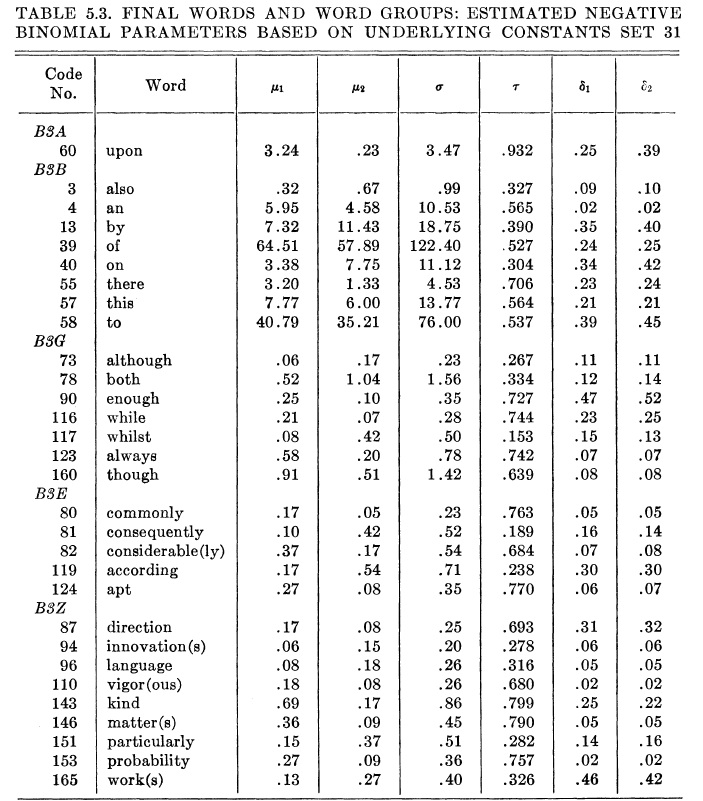

Большинство современных стилометрических исследований опираются на метод Дельты, придуманный Джоном Барроузом (John Burrows) в конце 1990-х — начале 2000-х годов. В его основе лежит подсчет разницы в частотностях между наиболее частотными словами в спорном тексте и тех трудах, чье авторство не вызывает сомнения. Чем меньше дельта, тем выше вероятность, что текст принадлежит ближайшему автору. Так Джон Барроуз изобрел первый универсальный инструмент для атрибуции текста. Многочисленные эксперименты показывают, что Дельта работает с разными жанрами и языками. Дельта уже многократно проверялась на разных вариантах английского, немецком, французском, итальянском, польском, русском, китайском и других языках, включая древние. Тексты неизменно кластеризуются алгоритмом по автору.

Дельта Берроуза: https://pure.spbu.ru/ws/portalfiles/portal/36984115/_._._.pdf

Вы можете попрактиковаться по ссылочке: https://github.com/dhhse/dhcourse/blob/master/stylometry/stylometry_minor.md

Туториал на английском языке: https://programminghistorian.org/en/lessons/introduction-to-stylometry-with-python

Авторский инвариант (англ. writer invariant, authorial invariant, author's invariant) — это количественная характеристика литературных текстов или некий параметр, который однозначно характеризует своим поведением произведения одного автора или небольшого числа «близких авторов», и принимает существенно разные значения для произведений разных групп авторов. Авторский инвариант применяется в задаче идентификации авторства текста.

Идеальные условия для стилистической атрибуции текста таковы:
* текст длинный;
* число потенциальных авторов невелико (лучше всего, если их два);
* у текста нет соавторов или рецензентов, а редакторы и издатели внесли очень мало изменений;
* для каждого кандидата в авторы есть много достоверно атрибутированных текстов того же жанра и периода, что и исследуемый текст.

Основные свойства, которыми должна обладать числовая характеристика авторского инварианта:
* Она должна быть достаточно «массовой», интегральной, чтобы слабо контролироваться автором на сознательном уровне. Другими словами, она должна быть его «бессознательным параметром», коренящимся настолько глубоко, что автор даже не задумывается о нем. А если бы даже задумался, то не смог бы долго его контролировать и в результате довольно быстро вернулся бы в прежнее устойчивое и типичное для него состояние.
* Искомый параметр должен сохранять «постоянное значение» для произведений данного автора. То есть, иметь небольшое отклонение от среднего значения (слабо колебаться) на протяжении всех его книг. Именно это свойство и позволяет говорить, что данный параметр является инвариантом.
* Параметр должен уверенно различать между собой разные группы писателей. Другими словами, должно существовать достаточное число авторских групп, заметно отличающихся друг от друга значениями инварианта.

Такими количественными характеристиками могут быть:
* Длина предложений, то есть среднее число слов в предложении.
* Длина слов, то есть среднее количество слогов в слове.
* Общая частота употребления служебных слов - предлогов, союзов, частиц, то есть процентное содержание служебных слов.
* Частота употребления существительных, то есть их процентное содержание.
* Частота употребления глаголов, то есть их процентное содержание.
* Частота употребления прилагательных (в процентах).
* Частота употребления предлога «в» (в процентах).
* Частота употребления частицы «не» (в процентах).
* Количество служебных слов в предложении, то есть среднее число союзов, предлогов и частиц в предложении.

Дополнительное чтение "Перенос стиля нейросетями: Дрейк, Летов, Оксимирон" https://sysblok.ru/nlp/avtorskij-stil-ego-raspoznanie-i-perenos/

Как вычисляли авторов "Беовульфа" https://sysblok.ru/philology/po-slovam-ih-uznaete-ih-kak-vychisljali-avtora-beovulfa/ 
Исследование: https://github.com/qcrit/NHB-2018-OEstylometry
Критика: https://arxiv.org/ftp/arxiv/papers/1910/1910.12927.pdf

# Семантические сети и графы знаний

Семантика – раздел языкознания, изучающий значение единиц языка, прежде всего его слов и словосочетаний. В более общем смысле, семантика определяет смысл знаков (образов, обозначений) и их сочетаний.

Семантическая сеть (смысловая сеть) — модель предметной области, представленная в виде графа, вершинами которого являются понятия, а дуги (ребра) – отношения между ними.

Семантические сети: как представить значения слов в виде графа https://sysblok.ru/nlp/semanticheskie-seti-kak-predstavit-znachenija-slov-v-vide-grafa/

Ссылка на библиотеку: https://github.com/lizaku/vec2graph

In [ ]:
! pip install vec2graph


In [ ]:
import urllib.request # библиотека для скачивания данных
import gensim # библиотека для загрузки и использвоания моделй w2v
from gensim.models import word2vec # непосредственно методы w2v
urllib.request.urlretrieve("http://rusvectores.org/static/models/rusvectores2/ruscorpora_mystem_cbow_300_2_2015.bin.gz", "ruscorpora_mystem_cbow_300_2_2015.bin.gz")
model_path = 'ruscorpora_mystem_cbow_300_2_2015.bin.gz'

MODEL = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)

In [ ]:
from vec2graph import visualize

In [ ]:
WORD = 'лук_S'
OUTPUT_DIR = 'tmp/graphs'
visualize(OUTPUT_DIR, MODEL, WORD, depth=0, topn=8, threshold=0.53, edge=1, sep=True)

Visualizations written to tmp/graphs


['лук_S']

Дополнительное чтение: "Как предсказать гипероним слова (и зачем). Моё участие в соревновании по пополнению таксономии" https://habr.com/ru/post/507228/

### Эмбеддинги для разных объектов

В рамках проекта "Учебная аналитика" (op.itmo.ru) реализуется попытка построить отображение учебной дисциплины в векторное пространство. На текущий момент в качестве измерений в этом пространстве используются ключевые слова. Но это не самая хорошая идея для развития проекта. Так как набор ключевых слов ничем не ограничен, а связанныев реальности  ключевые слова в этом пространстве никак не связаны. Выход из этого один: эмбеддинг дисциплины (Course2Vec).

Одна из идея для эмбеддинга. В рамках проекта Википедиа есть граф Wikidata, фактически являющийся семантической сетью.

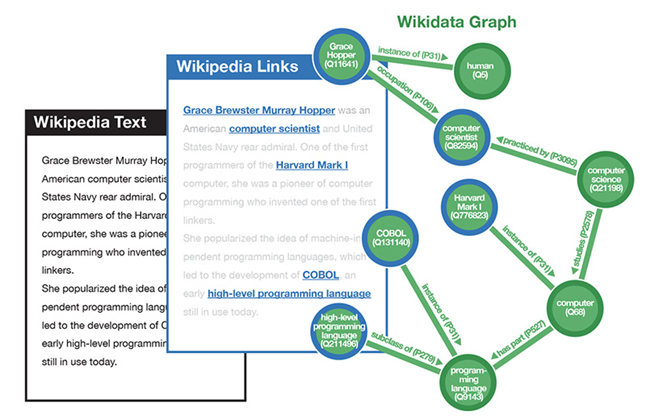

Некоторые вершины этого графа можно использовать как элементы векторного пространства. Например, там есть такие типы вершин, которые связаны обозначены как "academic discipline instance". Таких вершин 500. То есть эти вершины дают возможность построит 500-мерное пространство.

### Значимость достопримечательности

Гипотеза. Культурная значимость объекта зависит от личностей и событий, связанным с ним. В свою очередь можно отдельно оценивать значимость личностей и событий.

Метод решения: 

1) Устанавливаем семантические связи между объектом и личностью, между объектом и событием, между событием и личностью. Для этого могут подойти, например, тексты с Википедии. 

2) Используя многомодальность данных вычисляем значимость событий и личностей (например, количество разных языков, на которых есть страница; количество источников; количество символов на странице; количество объектов в Wikimedia и т.д.). 

3) Рассчитываем культурную значимость объекта.

# Итоги

## Рабочие группы (виртуальные научные лаборатории)

1. Анализ учебно-методической литературы и научных публикаций для проекта "учебная аналитика"
2. Анализ художественных текстов с применением подходов "дальнего чтения". К художественным текстам относятся пьесы, проза, поэзия, тексты песен.
3. Анализ текстов про Санкт-Петербург с целью выявления важных культурных объектов и личностей, с ними связанных.
4. Анализ текстов социальных сетей для выявления полярных позиций по спорным вопросам.

С вашей стороны: заинтересованность, идеи, желание и готовность тратить на это 1-10 часов в неделю.

С моей стороны: идеи, планирование и контроль результатов, поддержка и конструктивная критика, помощь в продвидении: написание статей и участие в конференциях, помощь в получении финансирования.

В чём профит: можно зачесть за практику, за работы по некоторым дисциплинам, взять в качестве темы ВКР; дополнительно "прокачивать" навыки анализа текстовых данных для решения интересных задач.

Пишите мне khlopotov@itmo.ru, если вам интересно заняться какой-то из перечисленных выше задач 


## Экзаменационные вопросы

Экзамен состоится 15 июня в 10.00 в zoom.

1. Методы сбора текстовых данных. Корпус текстов. 
2. Регулярные выражения.
3. Редакторское расстояние. Задача исправления опечаток.
4. Предобработка текста: токенизация.
5. Предобработка текста: нормализация (стемминг и лемматизация).
6. Морфологический анализ.
7. Частеречная разметка.
8. Предобработка текста: частотные векторные представления
9. Векторизация текста: мешок слов, мешок n-грамм, мешок символьных n-грамм, tf-idf.
10. Предобработка текста: эмбеддинги. Word2Vec.
11. Задача классификации текста.
12. Задача кластеризации текста.
13. Тематическое вероятностное моделирование.
14. Построение графа по текстовым данным.
15. Семантические сети и графы знаний.
16. Задачи анализа художественных текстов. Определение авторства.
17. NER.
18. Прикладные задачи компьютерной лингвистики.